# Irannian Leopard Population in Bamu National Park

### 99/11/15
### 99/12/04

Population contains two sex and two age categories; Female ang male, adult and subadult. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Data collected in Bamu Park has been given in the table:

|      | Female | Male |
| ---  |  ---   | ---  |
|Adults|    3   |   1  |
|Subadults|  1  |   1  |

For this model we define sex ratio as the ratio of the number of males per female and based on our assumptions it is constant during the time. We actually don't know the ratio of male to female newborns, but we are estimating the ratio by the ratio of total males to total females. total population contains adults and subadults.

\begin{align}
& sex ratio = \frac{male adults + male subadults}{female adults + female subadults}\\
& P(new born = male) \approx \frac{male adults + male subadults}{adults + subadults} = \frac{2}{6}
\end{align}


In [2]:
sex_ratio = 0.5 #2/6
p_male    = 2/6


# initial condition in Bamu park
adults    = [[1, 3]]
subadults = [[1, 1]]

In [3]:
p_give_birth = 1
# poisson distribution automatically gives zeros children sometimes
# p_give_birth makes no change as it is equal 1

def born(parents, p_give_birth, lam):
    nm, nf = parents
    if nm != 0: # Just one male adult is enough
        who_gives_birth = np.random.uniform(0, 1, nf)
        where = np.where(who_gives_birth <= p_give_birth)
        mothers = np.size(where)
        childs = np.random.poisson(lam, mothers)
        childs = np.sum(childs[childs <= 6])
    else:
        childs = 0
    determine_sex = np.random.uniform(0, 1, childs)
    where = np.where(determine_sex < p_male)
    male_newborn   = np.size(where)
    female_newborn = childs - male_newborn
    newborn = [male_newborn, female_newborn]
    
    return newborn

In [4]:
def dy(adults, death_prob): # no dy in subadults, equal dy probability for all male-female and ages
    nm, nf = adults
    nm = np.size(np.where(np.random.uniform(0, 1, nm) > death_prob))
    nf = np.size(np.where(np.random.uniform(0, 1, nf) > death_prob))
    return [nm, nf]


In [5]:
def evolution(adults, subadults, years, mean_life_time, puberty_age, p_give_birth, lam):
    death_prob     = 1 / mean_life_time

    total_subadults = subadults
    for year in range(years):
        if year < (puberty_age - 1):
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
            new_adults = dy(adults[year], death_prob)
            adults    = np.concatenate((adults, [new_adults]), axis = 0)

        else:
            new_adults = dy(np.add(adults[year], subadults[0]), death_prob)
            adults = np.concatenate((adults, [new_adults]), axis = 0)
            subadults = np.delete(subadults, (0), axis = 0)
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
    
    return adults, total_subadults

Text(0.5, 1.0, 'Poisson distribution for children born to a mother\n $\\lambda = $ 0.5')

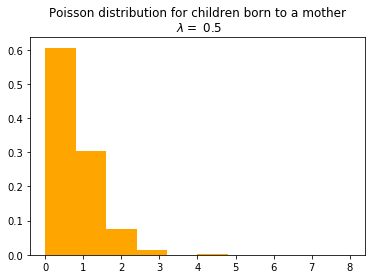

In [6]:
lam = 0.5
mothers = 10000000
myarray = np.random.poisson(lam, mothers)
weights = np.ones_like(myarray)/float(len(myarray))
plt.hist(myarray, color = 'orange', weights = weights)

plt.title(f"Poisson distribution for children born to a mother\n $\lambda = $ {lam}")

# plt.savefig("poisson.png")

Wall time: 261 ms


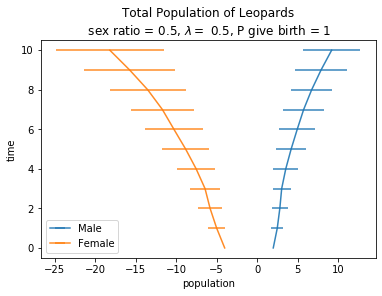

In [9]:
%%time

p_male = 2/6
sex_ratio = p_male / (1 - p_male)
years = 10
puberty_age = 3
mean_life_time = 23
p_give_birth = 1
lam = 0.5

adults_0    = [[1, 3]]
subadults_0 = [[1, 1]]

average_on = 100
adults, total_subadults = evolution(adults_0, subadults_0, years, mean_life_time, puberty_age, p_give_birth, lam)
males   = np.add(adults[:, 0], total_subadults[:, 0])
females = np.add(adults[:, 1], total_subadults[:, 1])

for ave in range(average_on):
    adults1, total_subadults1 = evolution(adults_0, subadults_0, years, mean_life_time, puberty_age, p_give_birth, lam)
    males   = np.concatenate((males, np.add(adults1[:, 0], total_subadults1[:, 0])), axis = 0)
    females =  np.concatenate((females, np.add(adults1[:, 1], total_subadults1[:, 1])), axis = 0)
 

males   = males.reshape(-1, years+1)
females = females.reshape(-1, years+1)

males_m   = males.mean(axis = 0)
males_std = np.std(males, axis = 0)

females_m = females.mean(axis = 0) 
females_std = np.std(females, axis = 0)

time = np.arange(years + 1)

plt.errorbar(males_m, time, yerr = None, xerr = males_std, alpha = 0.9, label = 'Male')
plt.errorbar(-females_m, time, yerr = None, xerr = females_std, alpha = 0.9, label = 'Female')

plt.title(f"Total Population of Leopards\n sex ratio = {np.round(sex_ratio, 2)}, $\lambda =$ {lam}, P give birth = {p_give_birth}")
plt.ylabel("time")
plt.xlabel("population")
plt.legend()
# plt.savefig("evol1.png")

## Plotting Population Pyramid

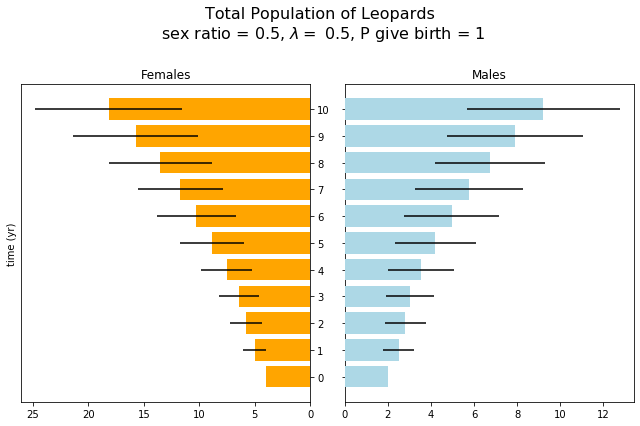

<Figure size 432x288 with 0 Axes>

In [10]:
fig, axes = plt.subplots(ncols=2, figsize = (9, 6) , sharey=True)

fig.suptitle(f"Total Population of Leopards\n sex ratio = {np.round(sex_ratio, 2)}, $\lambda =$ {lam}, P give birth = {p_give_birth}", fontsize = 16)


axes[0].barh(time, females_m, xerr = females_std, align='center', color='orange', zorder=10)
axes[0].set(title='Females')
axes[1].barh(time, males_m, xerr = males_std, align='center', color='lightblue', zorder=10)
axes[1].set(title='Males')

axes[0].invert_xaxis()
axes[0].set(yticks = time, yticklabels = time)
axes[0].yaxis.tick_right()
axes[0].set_ylabel("time (yr)")


fig.tight_layout()
fig.subplots_adjust(wspace = 0.12)
fig.subplots_adjust(top = 0.80)
plt.show()


plt.savefig("pp1.png")

## Includig abnormal morality rate

In [11]:
def evolution_amorality(adults, subadults, years, mean_life_time, puberty_age, p_give_birth, lam, a_morality):
    death_prob     = 1 / mean_life_time + a_morality

    total_subadults = subadults
    for year in range(years):
        if year < (puberty_age - 1):
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
            new_adults = dy(adults[year], death_prob)
            adults    = np.concatenate((adults, [new_adults]), axis = 0)

        else:
            new_adults = dy(np.add(adults[year], subadults[0]), death_prob)
            adults = np.concatenate((adults, [new_adults]), axis = 0)
            subadults = np.delete(subadults, (0), axis = 0)
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
    
    return adults, total_subadults

Wall time: 1.12 s


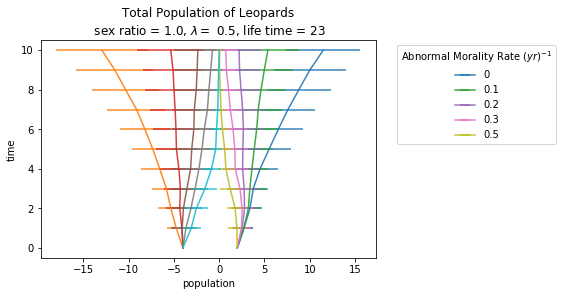

In [12]:
%%time


p_male = 0.5
sex_ratio = p_male / (1 - p_male)

years = 10
puberty_age = 3
mean_life_time = 23
p_give_birth = 1
lam = 0.5

adults_0    = [[1, 3]]
subadults_0 = [[1, 1]]

average_on = 100

for a_morality in [0, 0.1, 0.2, 0.3, 0.5]:
    adults, total_subadults = evolution_amorality(adults_0, subadults_0, years, mean_life_time,
                                                   puberty_age, p_give_birth, lam, a_morality)
    males   = np.add(adults[:, 0], total_subadults[:, 0])
    females = np.add(adults[:, 1], total_subadults[:, 1])

    for ave in range(average_on):
        adults1, total_subadults1 = evolution_amorality(adults_0, subadults_0, years, mean_life_time, 
                                              puberty_age, p_give_birth, lam, a_morality)
        males   = np.concatenate((males, np.add(adults1[:, 0], total_subadults1[:, 0])), axis = 0)
        females =  np.concatenate((females, np.add(adults1[:, 1], total_subadults1[:, 1])), axis = 0)


    males   = males.reshape(-1, years+1)
    females = females.reshape(-1, years+1)

    males_m   = males.mean(axis = 0)
    males_std = np.std(males, axis = 0)

    females_m = females.mean(axis = 0) 
    females_std = np.std(females, axis = 0)

    time = np.arange(years + 1)

    plt.errorbar(males_m, time, yerr = None, xerr = males_std, alpha = 0.9, label = f"{a_morality}")
    plt.errorbar(-females_m, time, yerr = None, xerr = females_std, alpha = 0.9)

plt.title(f"Total Population of Leopards\n sex ratio = {np.round(sex_ratio, 2)}, $\lambda =$ {lam}, life time = {mean_life_time}")
plt.ylabel("time")
plt.xlabel("population")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Abnormal Morality Rate $(yr)^{-1}$')
# plt.savefig("a_morality.png")

Wall time: 1.68 s


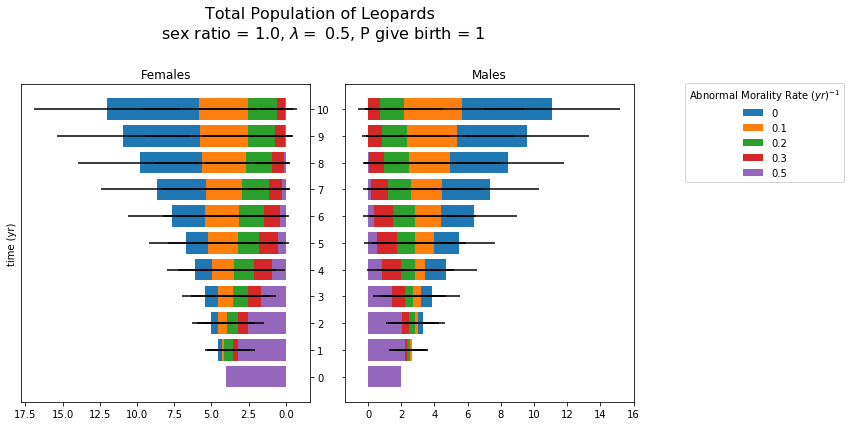

In [13]:
%%time


p_male = 0.5
sex_ratio = p_male / (1 - p_male)

years = 10
puberty_age = 3
mean_life_time = 23
p_give_birth = 1
lam = 0.5

adults_0    = [[1, 3]]
subadults_0 = [[1, 1]]

average_on = 100

#plot
fig, axes = plt.subplots(ncols=2, figsize = (9, 6) , sharey=True)
fig.suptitle(f"Total Population of Leopards\n sex ratio = {np.round(sex_ratio, 2)}, $\lambda =$ {lam}, P give birth = {p_give_birth}", fontsize = 16)


for a_morality in [0, 0.1, 0.2, 0.3, 0.5]:
    adults, total_subadults = evolution_amorality(adults_0, subadults_0, years, mean_life_time,
                                                   puberty_age, p_give_birth, lam, a_morality)
    males   = np.add(adults[:, 0], total_subadults[:, 0])
    females = np.add(adults[:, 1], total_subadults[:, 1])

    for ave in range(average_on):
        adults1, total_subadults1 = evolution_amorality(adults_0, subadults_0, years, mean_life_time, 
                                              puberty_age, p_give_birth, lam, a_morality)
        males   = np.concatenate((males, np.add(adults1[:, 0], total_subadults1[:, 0])), axis = 0)
        females =  np.concatenate((females, np.add(adults1[:, 1], total_subadults1[:, 1])), axis = 0)


    males   = males.reshape(-1, years+1)
    females = females.reshape(-1, years+1)

    males_m   = males.mean(axis = 0)
    males_std = np.std(males, axis = 0)

    females_m = females.mean(axis = 0) 
    females_std = np.std(females, axis = 0)

    time = np.arange(years + 1)
    
    axes[0].barh(time, females_m, xerr = females_std, align='center', zorder=10, label = f"{a_morality}")
    axes[1].barh(time, males_m, xerr = males_std, align='center', zorder=10)


axes[0].set(title='Females')
axes[1].set(title='Males')

axes[0].invert_xaxis()
axes[0].set(yticks = time, yticklabels = time)
axes[0].yaxis.tick_right()
axes[0].set_ylabel("time (yr)")


fig.tight_layout()
fig.subplots_adjust(wspace = 0.12)
fig.subplots_adjust(top = 0.80)
fig.legend(bbox_to_anchor=(1.05, 0.805), loc='upper left', title = 'Abnormal Morality Rate $(yr)^{-1}$')
plt.savefig("a_morality.png")


## Random choice instead of poisson

Not all matings lead to puppies and the probability to have 2 puppies is more than 1 and 3 and the other cases are too rare. In this case I am tuning the probabilities in "born choice" function. 

In [14]:
import random

def born_choice(parents):
    nm, nf = parents
    if nm != 0:
        childs = random.choices([0, 1, 2, 3], weights = [0.75, 0.04, 0.1, 0.01], k = nf) #probilities have been tuned
        childs = int(np.sum(childs))
    else:
        childs = 0
    determine_sex = np.random.uniform(0, 1, childs)
    where = np.where(determine_sex < p_male)
    male_newborn   = np.size(where)
    female_newborn = childs - male_newborn
    newborn = [male_newborn, female_newborn]
    
    return newborn

In [15]:
def evolution_choice(adults, subadults, years, mean_life_time, puberty_age, p_give_birth, lam):
    death_prob     = 1 / mean_life_time

    total_subadults = subadults
    for year in range(years):
        if year < (puberty_age - 1):
            subadults = np.concatenate((subadults, [born_choice(adults[year])]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
            new_adults = dy(adults[year], death_prob)
            adults    = np.concatenate((adults, [new_adults]), axis = 0)

        else:
            new_adults = dy(np.add(adults[year], subadults[0]), death_prob)
            adults = np.concatenate((adults, [new_adults]), axis = 0)
            subadults = np.delete(subadults, (0), axis = 0)
            subadults = np.concatenate((subadults, [born_choice(adults[year])]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
    
    return adults, total_subadults

Wall time: 860 ms


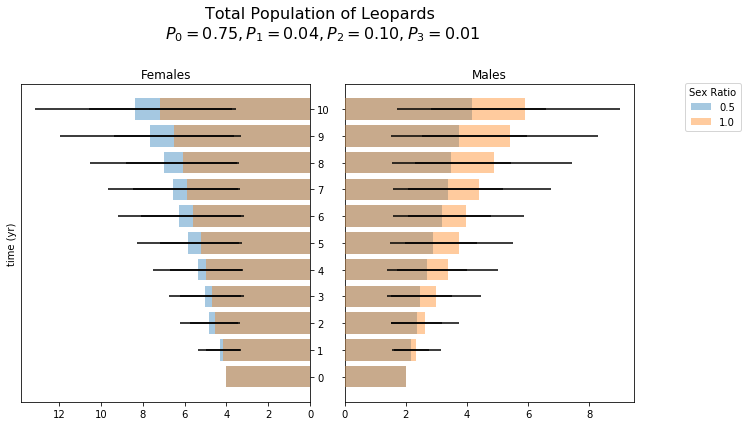

In [16]:
%%time

years = 10
puberty_age = 3
mean_life_time = 15
p_give_birth = 1
lam = 0.5

adults_0    = [[1, 3]]
subadults_0 = [[1, 1]]

average_on = 100

#plot
fig, axes = plt.subplots(ncols=2, figsize = (9, 6) , sharey=True)
fig.suptitle(f"Total Population of Leopards\n $P_0 = 0.75, P_1 = 0.04, P_2 = 0.10, P_3 = 0.01$", fontsize = 16)


for p_male in [2/6, 3/6]:
    sex_ratio = p_male / (1 - p_male)
    adults, total_subadults = evolution_choice(adults_0, subadults_0, years, mean_life_time,
                                                   puberty_age, p_give_birth, lam)
    males   = np.add(adults[:, 0], total_subadults[:, 0])
    females = np.add(adults[:, 1], total_subadults[:, 1])

    for ave in range(average_on):
        adults1, total_subadults1 = evolution_choice(adults_0, subadults_0, years, mean_life_time, 
                                              puberty_age, p_give_birth, lam,)
        males   = np.concatenate((males, np.add(adults1[:, 0], total_subadults1[:, 0])), axis = 0)
        females =  np.concatenate((females, np.add(adults1[:, 1], total_subadults1[:, 1])), axis = 0)


    males   = males.reshape(-1, years+1)
    females = females.reshape(-1, years+1)

    males_m   = males.mean(axis = 0)
    males_std = np.std(males, axis = 0)

    females_m = females.mean(axis = 0) 
    females_std = np.std(females, axis = 0)

    time = np.arange(years + 1)

    axes[0].barh(time, females_m, xerr = females_std, align='center', zorder=10, label = f"{np.round(sex_ratio, 2)}", alpha = 0.4)
    axes[1].barh(time, males_m, xerr = males_std, align='center', zorder=10, alpha = 0.4)


axes[0].set(title='Females')
axes[1].set(title='Males')

axes[0].invert_xaxis()
axes[0].set(yticks = time, yticklabels = time)
axes[0].yaxis.tick_right()
axes[0].set_ylabel("time (yr)")


fig.tight_layout()
fig.subplots_adjust(wspace = 0.12)
fig.subplots_adjust(top = 0.80)
fig.legend(bbox_to_anchor=(1.05, 0.805), loc='upper left', title = 'Sex Ratio')

plt.savefig("choice1.png")

An other distribution based on conditions of captivity

In [19]:
def born_choice(parents):
    nm, nf = parents
    if nm != 0:
        childs = random.choices([0, 1, 2, 3], weights = [0.35, 0.25, 0.35, 0.05], k = nf) #probilities have been tuned
        childs = int(np.sum(childs))
    else:
        childs = 0
    determine_sex = np.random.uniform(0, 1, childs)
    where = np.where(determine_sex < p_male)
    male_newborn   = np.size(where)
    female_newborn = childs - male_newborn
    newborn = [male_newborn, female_newborn]
    
    return newborn

Wall time: 903 ms


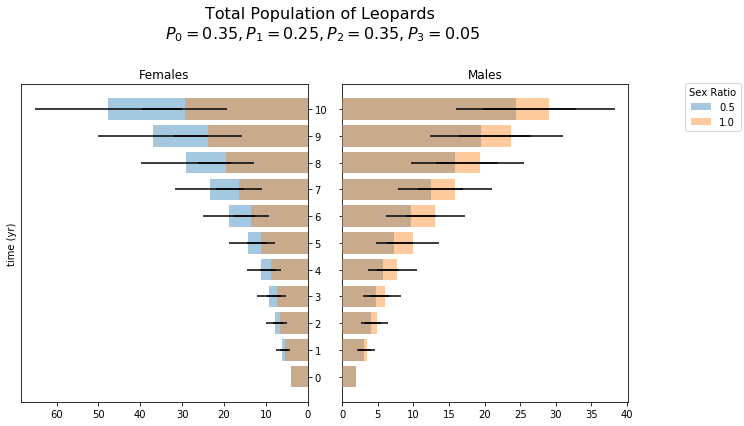

In [20]:
%%time

years = 10
puberty_age = 3
mean_life_time = 15
p_give_birth = 1
lam = 0.5

adults_0    = [[1, 3]]
subadults_0 = [[1, 1]]

average_on = 100

#plot
fig, axes = plt.subplots(ncols=2, figsize = (9, 6) , sharey=True)
fig.suptitle(f"Total Population of Leopards\n $P_0 = 0.35, P_1 = 0.25, P_2 = 0.35, P_3 = 0.05$", fontsize = 16)


for p_male in [2/6, 3/6]:
    sex_ratio = p_male / (1 - p_male)
    adults, total_subadults = evolution_choice(adults_0, subadults_0, years, mean_life_time,
                                                   puberty_age, p_give_birth, lam)
    males   = np.add(adults[:, 0], total_subadults[:, 0])
    females = np.add(adults[:, 1], total_subadults[:, 1])

    for ave in range(average_on):
        adults1, total_subadults1 = evolution_choice(adults_0, subadults_0, years, mean_life_time, 
                                              puberty_age, p_give_birth, lam,)
        males   = np.concatenate((males, np.add(adults1[:, 0], total_subadults1[:, 0])), axis = 0)
        females =  np.concatenate((females, np.add(adults1[:, 1], total_subadults1[:, 1])), axis = 0)


    males   = males.reshape(-1, years+1)
    females = females.reshape(-1, years+1)

    males_m   = males.mean(axis = 0)
    males_std = np.std(males, axis = 0)

    females_m = females.mean(axis = 0) 
    females_std = np.std(females, axis = 0)

    time = np.arange(years + 1)

    axes[0].barh(time, females_m, xerr = females_std, align='center', zorder=10, label = f"{np.round(sex_ratio, 2)}", alpha = 0.4)
    axes[1].barh(time, males_m, xerr = males_std, align='center', zorder=10, alpha = 0.4)


axes[0].set(title='Females')
axes[1].set(title='Males')

axes[0].invert_xaxis()
axes[0].set(yticks = time, yticklabels = time)
axes[0].yaxis.tick_right()
axes[0].set_ylabel("time (yr)")


fig.tight_layout()
fig.subplots_adjust(wspace = 0.12)
fig.subplots_adjust(top = 0.80)
fig.legend(bbox_to_anchor=(1.05, 0.805), loc='upper left', title = 'Sex Ratio')


plt.savefig("choice2c.png")

## Probability of Extinction

In [22]:
#does it extinc?

def extinc(adults, subadults, mean_life_time, puberty_age, p_give_birth, lam, a_morality):
    death_prob     = 1 / mean_life_time + a_morality

    total_subadults = subadults
    year = 0
    while(1):
        if year < (puberty_age - 1):
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
            new_adults = dy(adults[year], death_prob)
            adults    = np.concatenate((adults, [new_adults]), axis = 0)

        else:
            new_adults = dy(np.add(adults[year], subadults[0]), death_prob)
            adults = np.concatenate((adults, [new_adults]), axis = 0)
            subadults = np.delete(subadults, (0), axis = 0)
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
        
        year += 1
        
        nf = adults[year, 1] + total_subadults[year, 1]
        
        if nf == 0: #exinction condition (absolute)
            return 1
        if nf > 50: #reaching from 3 to 50 females strongly recomends it doesn't extinct
            return 0

Wall time: 1min 26s


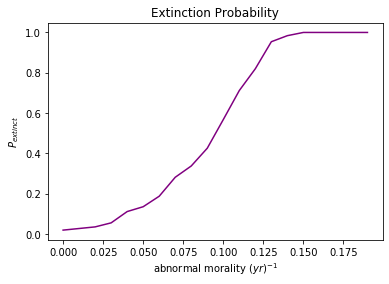

In [23]:
%%time

average_on = 500

morality_range = np.arange(0, 0.2, 0.01)

p_extinct   = []
for a_morality in morality_range:
    sample_extinct = 0
    for ave in range(average_on):
        sample_extinct += extinc(adults_0, subadults_0, mean_life_time, puberty_age, p_give_birth, lam, a_morality)
    p_extinct.append(sample_extinct / average_on)

plt.plot(morality_range, p_extinct, c = 'purple')
plt.title("Extinction Probability")

plt.ylabel("$P_{extinct}$")
plt.xlabel('abnormal morality $(yr)^{-1}$')

plt.savefig("ext.png")

## Probability to reach k-th generation

In [24]:
#does it extinc?

def when_extinc(adults, subadults, mean_life_time, puberty_age, p_give_birth, lam, a_morality):
    death_prob     = 1 / mean_life_time + a_morality

    total_subadults = subadults
    year = 0
    while(1):
        if year < (puberty_age - 1):
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
            new_adults = dy(adults[year], death_prob)
            adults    = np.concatenate((adults, [new_adults]), axis = 0)

        else:
            new_adults = dy(np.add(adults[year], subadults[0]), death_prob)
            adults = np.concatenate((adults, [new_adults]), axis = 0)
            subadults = np.delete(subadults, (0), axis = 0)
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
        
        year += 1
        
        nf = adults[year, 1] + total_subadults[year, 1]
        
        if nf == 0:
            return year
        if nf > 50:
            return 1000

In [46]:

when_extinc(adults_0, subadults_0, mean_life_time, puberty_age, p_give_birth, lam, 0.5)

5

## How does "dy" function work

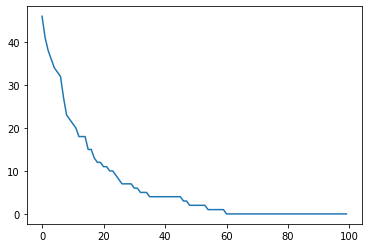

In [208]:
peaple = []
new = [50, 50]
tt = 100
for t in range(tt):
    new = dy(new, 1 / mean_life_time)
    peaple.append(new[0])

plt.plot(np.arange(tt), peaple)
